# Parsing phenotype information for rare diseases

Download the rare disease phenotype information from OrphaData and extract it for use in our rare disease network.

Original file downloaded from: http://www.orphadata.org/cgi-bin/inc/product4.inc.php on 2017-08-01 (English edition).

In [1]:
import xml.etree.ElementTree as ET
from collections import defaultdict

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

## Phenotype XML parser

In [3]:
def parse_phenos(root):
    """Parse out phenotypes associated with rare diseases."""
    phenos = defaultdict(list)

    for disease in root.iter("Disorder"):
        dise_id = disease.find("OrphaNumber").text
        dise_name = disease.find("Name").text

        for pheno in disease.iterfind("HPODisorderAssociationList/HPODisorderAssociation"):
            hpo_id = pheno.find("HPO/HPOId").text
            hpo_name = pheno.find("HPO/HPOTerm").text
            
            freq = pheno.find("HPOFrequency/Name").text

            vals = ["dise_id", "dise_name", "hpo_id", "hpo_name", "freq"]
            for vname in vals:
                phenos[vname].append(locals()[vname])
        
    return (pd
        .DataFrame(phenos)
        .astype({"dise_id": np.int64})
    )

In [4]:
tree = ET.parse("../data/raw/orphanet/rare_disease_phenotypes.xml")

root = tree.getroot()

---

## Examine results

In [5]:
phenos = parse_phenos(root)

In [6]:
phenos.shape

(56392, 5)

In [7]:
phenos.head()

,dise_id,dise_name,freq,hpo_id,hpo_name
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",Very frequent (99-80%),HP:0000256,Macrocephaly
1,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",Very frequent (99-80%),HP:0000272,Malar flattening
2,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",Very frequent (99-80%),HP:0000316,Hypertelorism
3,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",Very frequent (99-80%),HP:0000369,Low-set ears
4,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",Very frequent (99-80%),HP:0000470,Short neck


In [8]:
phenos["dise_id"].nunique()

2743

In [9]:
phenos["hpo_id"].nunique()

4935

In [10]:
phenos["freq"].value_counts()

Very frequent (99-80%)    22254
Frequent (79-30%)         16604
Occasional (29-5%)        16413
Very rare (<4-1%)           596
Obligate (100%)             395
Excluded (0%)               130
Name: freq, dtype: int64

## Number of phenotypes per disease

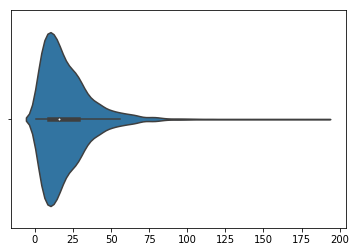

In [11]:
sns.violinplot(phenos.groupby("dise_id").size())

---

In [12]:
phenos = phenos.query("freq != 'Excluded (0%)'")

In [13]:
phenos.to_csv("data/orpha_phenos.tsv", sep='\t', index=False)